Measured periods at threshold 0.5:
[6.28264553 6.2750613  6.3000515  6.28737235 6.27039602 6.31339713]
Min:  6.2704
Max:  6.3134
Mean: 6.2882
Std dev: 0.0147


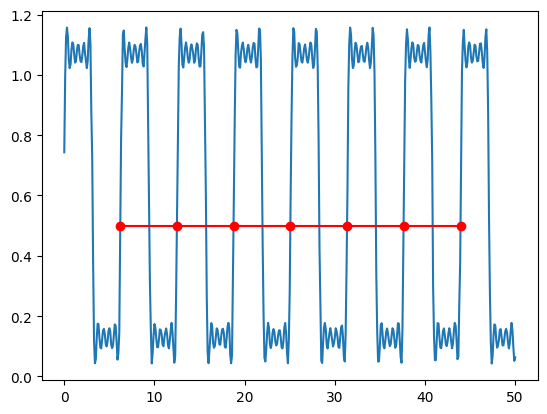

In [1]:
# from https://stackoverflow.com/questions/15112964/digitizing-an-analog-signal

from __future__ import division

import numpy as np


def find_transition_times(t, y, threshold):
    """
    Given the input signal `y` with samples at times `t`,
    find the times where `y` increases through the value `threshold`.

    `t` and `y` must be 1-D numpy arrays.

    Linear interpolation is used to estimate the time `t` between
    samples at which the transitions occur.
    """
    # Find where y crosses the threshold (increasing).
    lower = y < threshold
    higher = y >= threshold
    transition_indices = np.where(lower[:-1] & higher[1:])[0]

    # Linearly interpolate the time values where the transition occurs.
    t0 = t[transition_indices]
    t1 = t[transition_indices + 1]
    y0 = y[transition_indices]
    y1 = y[transition_indices + 1]
    slope = (y1 - y0) / (t1 - t0)
    transition_times = t0 + (threshold - y0) / slope

    return transition_times


def periods(t, y, threshold):
    """
    Given the input signal `y` with samples at times `t`,
    find the time periods between the times at which the
    signal `y` increases through the value `threshold`.

    `t` and `y` must be 1-D numpy arrays.
    """
    transition_times = find_transition_times(t, y, threshold)
    deltas = np.diff(transition_times)
    return deltas


if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # Time samples
    t = np.linspace(0, 50, 501)
    # Use a noisy time to generate a noisy y.
    tn = t + 0.05 * np.random.rand(t.size)
    y = 0.6 * ( 1 + np.sin(tn) + (1./3) * np.sin(3*tn) + (1./5) * np.sin(5*tn) +
               (1./7) * np.sin(7*tn) + (1./9) * np.sin(9*tn))

    threshold = 0.5
    deltas = periods(t, y, threshold)
    print("Measured periods at threshold %g:" % threshold)
    print(deltas)
    print("Min:  %.5g" % deltas.min())
    print("Max:  %.5g" % deltas.max())
    print("Mean: %.5g" % deltas.mean())
    print("Std dev: %.5g" % deltas.std())

    trans_times = find_transition_times(t, y, threshold)

    plt.plot(t, y)
    plt.plot(trans_times, threshold * np.ones_like(trans_times), 'ro-')
    plt.show()
    
    
# The output:

# Measured periods at threshold 0.5:
# [ 6.29283207  6.29118893  6.27425846  6.29580066  6.28310224  6.30335003]
# Min:  6.2743
# Max:  6.3034
# Mean: 6.2901
# Std dev: 0.0092793